# The Evolution of LEGO Since 1950
#### John Martinez

[LEGO](https://en.wikipedia.org/wiki/Lego) is one of the most popular building toy brands in existence. In the lifetime of the company, the playsets of LEGO have adopted over 600 unique themes, including many well-known liscenced properties like Star Wars and Harry Potter, and several of its own, like Ninjago and Bionicle. In the beginning, however, LEGO only had a few of its own themes, and its sets consisted of little more than rectangularly prismatic bricks that simply varied in their dimensions. Here, we would like to see precisely how LEGO has progressed into what it is today. 

## Data Overview

The [dataset](https://www.kaggle.com/rtatman/lego-database/data) we will be using contains several csvs with information on every LEGO set released between 1950 and 2017. With it, we can look at data such as the size, colors, themes, and complexities of the sets during each of these years.

### Dependencies

In [148]:
# Here are all the dependencies we will need for our analysis
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import zipfile
%matplotlib inline

### Loading 

In [149]:
# Simply have the .zip in the same directory and we can extract all the csvs with code 
zip_ref = zipfile.ZipFile('lego-database.zip', 'r')
zip_ref.extractall('lego-database')
zip_ref.close()

In [150]:
# Let's load all the csvs at once here 
colors = pd.read_csv("lego-database/colors.csv")
inventory_parts = pd.read_csv("lego-database/inventory_parts.csv")
parts = pd.read_csv("lego-database/parts.csv")
inventory_sets = pd.read_csv("lego-database/inventory_sets.csv")
sets = pd.read_csv("lego-database/sets.csv")
inventories = pd.read_csv("lego-database/inventories.csv")
part_categories = pd.read_csv("lego-database/part_categories.csv")
themes = pd.read_csv("lego-database/themes.csv")

### The Schema

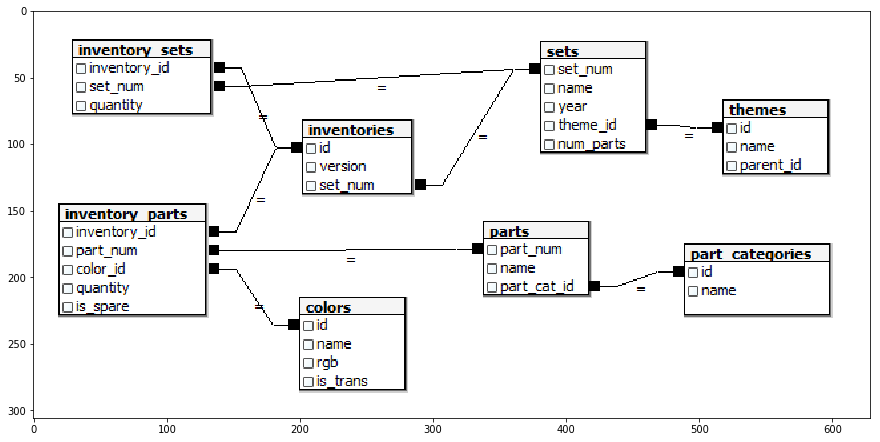

In [151]:
# The dataset also contained this image about the schema
# We will be using it as a reference to relate the csvs to each other
img = imageio.imread("lego-database/downloads_schema.png")
plt.figure(figsize=(15,15))
plt.imshow(img)

## Question 1: How have LEGO themes changed over time?

Let us begin the analysis of LEGO's evolution with the evolution of its themes. LEGO themes have come and gone and some have gotten more sets than others. Has LEGO been getting more diverse in its themes?

### How many LEGO themes have been released, debuted, and discontinued every year?

In [152]:
# First, we'll have to count the number of distinct themes released each year.
themes_per_year = sets.groupby("year").theme_id.nunique()
themes_per_year.head()

year
1950    2
1953    1
1954    2
1955    4
1956    3
Name: theme_id, dtype: int64

In [153]:
# Next, we'll find the number of themes released for the first time each year. 
# This will take some manipulation. First we'll get the first year of each theme 
firstyears = sets.groupby("theme_id").year.min()
firstyears.head()

theme_id
1    1982
2    1986
3    1998
4    1977
5    1999
Name: year, dtype: int64

In [154]:
# Now, we can get the number of times each year is a first for a theme 
new_themes_per_year = firstyears.value_counts().sort_index()
new_themes_per_year.head()

1950    2
1954    1
1955    2
1957    1
1960    1
Name: year, dtype: int64

In [155]:
# We'll do the exact same for years where themes end 
dead_themes_per_year = sets.groupby("theme_id").year.max().value_counts().sort_index()
dead_themes_per_year.head()

1955    1
1957    1
1963    2
1964    2
1965    1
Name: year, dtype: int64

In [156]:
# And we'll create a DataFrame so we can have column names and plot it with a legend
theme_lifetimes = pd.DataFrame()
theme_lifetimes["Themes Released"] = themes_per_year
theme_lifetimes["Debuts"] = new_themes_per_year
theme_lifetimes["Discontinuations"] = dead_themes_per_year
theme_lifetimes.fillna(0, inplace=True)
# We remove the last number of discontinuations because it is automatically equal 
# to the number of releases by virtue of it being the last year
theme_lifetimes.at[2017, "Discontinuations"] = None
theme_lifetimes.head()

,Themes Released,Debuts,Discontinuations
year,,,
1950,2,2.0,0.0
1953,1,0.0,0.0
1954,2,1.0,0.0
1955,4,2.0,1.0
1956,3,0.0,0.0


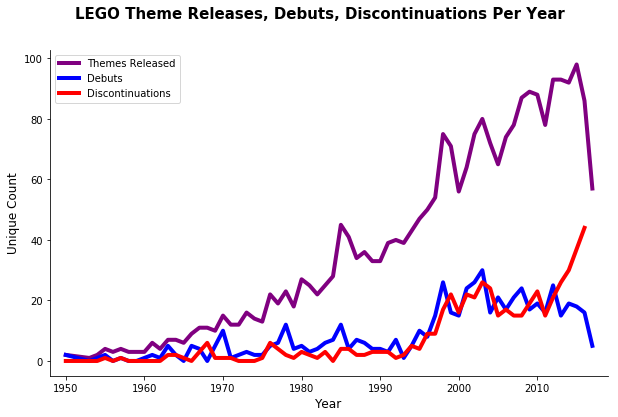

In [157]:
# Finally, we'll plot it with a line graph 
fig, ax = plt.subplots(figsize=(10,6))
theme_lifetimes.plot(ax = ax, color = ['purple', 'blue', 'red'], linewidth = 4)

# Adjusting the labels and axes
fig.suptitle("LEGO Theme Releases, Debuts, Discontinuations Per Year", 
            fontsize = 15, fontweight = 'bold')

ax.set_xlim(1948, 2019)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Unique Count", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


As we can see here, the number of themes released has increased rapidly over the years. This is possibly because themes do not die nearly as often, so LEGO has kept piling on the themes. Discontinuations and debuts have been low in comparison. Interestingly, though, the number of discontinuations began spiking around 1995 and is near the number of 2017 releases in 2016. 

### How many sets are of the top LEGO themes?

In [158]:
# We will need to match the themes with their ids for this analysis
set_themes = sets.join(themes.set_index('id'), on='theme_id', rsuffix = '_theme')
set_themes.head()

,set_num,name,year,theme_id,num_parts,name_theme,parent_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,Supplemental,126.0


In [159]:
# Getting all-time the count of each theme, descending order
theme_counts = set_themes.groupby('name_theme').name_theme.count().sort_values(ascending=False)
theme_counts.shape

(386,)

Since there are this many themes, let us look at only the top 20. How many sets have each of these top themes ever taken the form of? 

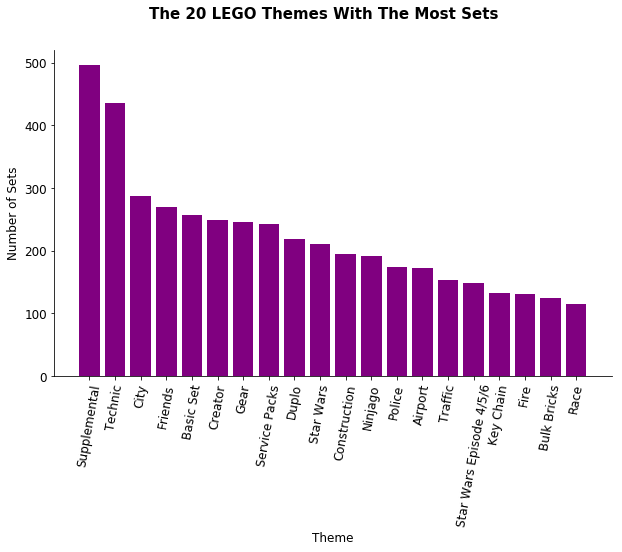

In [160]:
# Setting up a bar graph with size, color and fonts 
top_themes = theme_counts[:20]

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(top_themes.index, top_themes, color = 'purple')

# Titles & axis labels
ax.tick_params(axis='x', rotation=80)
ax.tick_params(labelsize=12)
fig.suptitle("The 20 LEGO Themes With The Most Sets", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Theme", fontsize=12)
ax.set_ylabel("Number of Sets", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In this bar graph we can see that the Supplemental theme has had nearly 500 sets over the years. Out of these top 20, the only two liscensed themes are both Star Wars. 

## Question 2: Has LEGO been getting more colorful?

Long, long ago, LEGO was once just composed of primary colors and rectangles. We now know there are over 100 colors of bricks, even transparent ones. Let us see how these colors have emerged over the years. 

### How many LEGO colors have been released, debuted, and discontinued every year?

In [161]:
# Let's now do exactly what we did with the themes, but with the colors. 
# We'll first have to join the sets with their brick colors.  
sets_inv_ids = sets.set_index("set_num").join(inventories.set_index("set_num"))
sets_inv_ids.head()

,name,year,theme_id,num_parts,id,version
set_num,,,,,,
00-1,Weetabix Castle,1970,414,471,5574.0,1.0
00-2,Weetabix Promotional House 1,1976,413,147,13813.0,1.0
00-3,Weetabix Promotional House 2,1976,413,149,898.0,1.0
00-4,Weetabix Promotional Windmill,1976,413,126,1073.0,1.0
00-6,Special Offer,1985,67,3,2836.0,1.0


In [162]:
# Now we'll join on the inventory ids 
sets_inv_ids.rename(columns={"id":"inventory_id"}, inplace = True)
sets_inv_ids.set_index("inventory_id", inplace=True)
sets_inv_ids.head()

,name,year,theme_id,num_parts,version
inventory_id,,,,,
5574.0,Weetabix Castle,1970,414,471,1.0
13813.0,Weetabix Promotional House 1,1976,413,147,1.0
898.0,Weetabix Promotional House 2,1976,413,149,1.0
1073.0,Weetabix Promotional Windmill,1976,413,126,1.0
2836.0,Special Offer,1985,67,3,1.0


In [163]:
# And now we have the sets with their parts
sets_inventory_parts = sets_inv_ids.join(inventory_parts.set_index("inventory_id"))
sets_inventory_parts.head()

,name,year,theme_id,num_parts,version,part_num,color_id,quantity,is_spare
inventory_id,,,,,,,,,
1.0,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,1.0,48379c01,72.0,1.0,f
1.0,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,1.0,48395,7.0,1.0,f
1.0,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,1.0,mcsport6,25.0,1.0,f
1.0,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,1.0,paddle,0.0,1.0,f
3.0,Emma's Splash Pool,2012,494,43,1.0,11816pr0005,78.0,1.0,f


In [164]:
# To verify that we joined correctly, this DataFrame should be rather large
sets_inventory_parts.shape

(581211, 9)

In [165]:
# Now to sort of recycle some code
colors_per_year = sets_inventory_parts.groupby("year").color_id.nunique()
colors_per_year.head()

year
1950    10
1953     5
1954     7
1955     7
1956     5
Name: color_id, dtype: int64

In [166]:
new_colors_per_year = sets_inventory_parts.groupby("color_id").year.min().value_counts().sort_index()
new_colors_per_year.head()

1950    10
1954     1
1955     1
1956     1
1957     2
Name: year, dtype: int64

In [167]:
dead_colors_per_year = sets_inventory_parts.groupby("color_id").year.max().value_counts().sort_index()
dead_colors_per_year.head()

1993    1
1997    1
1999    2
2000    1
2002    1
Name: year, dtype: int64

In [168]:
# You know the drill
color_lifetimes = pd.DataFrame()
color_lifetimes["Colors Released"] = colors_per_year
color_lifetimes["Debuts"] = new_colors_per_year
color_lifetimes["Discontinuations"] = dead_colors_per_year
color_lifetimes.fillna(0, inplace=True)
color_lifetimes.at[2017, "Discontinuations"] = None
color_lifetimes.head()

,Colors Released,Debuts,Discontinuations
year,,,
1950,10,10.0,0.0
1953,5,0.0,0.0
1954,7,1.0,0.0
1955,7,1.0,0.0
1956,5,1.0,0.0


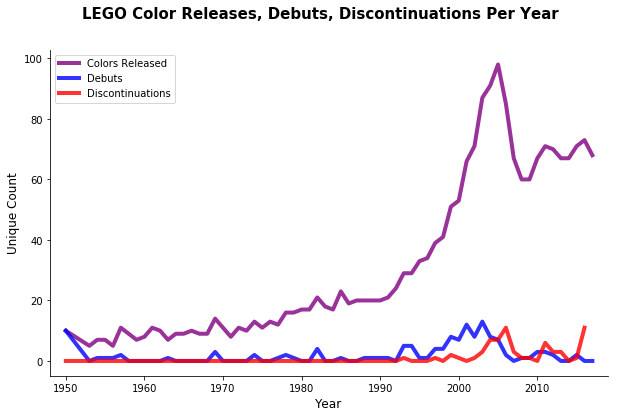

In [169]:
fig, ax = plt.subplots(figsize=(10,6))
color_lifetimes.plot(ax = ax, color = ['purple', 'blue', 'red'], linewidth = 4, alpha = 0.8)

# Adjusting the labels and axes
fig.suptitle("LEGO Color Releases, Debuts, Discontinuations Per Year", 
            fontsize = 15, fontweight = 'bold')

ax.set_xlim(1948, 2019)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Unique Count", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

Just like with the themes, the colors have been rapidly piling on. However, unlike with the themes, LEGO has seldom debuted or discontinued a color, though it seems there were some major spikes in the last two decades

### How has LEGO's color distribution changed?

In [170]:
# Let's get the rgb for each of these colors 
rgb = colors.rename(columns={'id':'color_id'}).set_index('color_id')
rgb.head()

,name,rgb,is_trans
color_id,,,
-1,Unknown,0033B2,f
0,Black,05131D,f
1,Blue,0055BF,f
2,Green,237841,f
3,Dark Turquoise,008F9B,f


In [171]:
sets_parts_colors = sets_inventory_parts.set_index('color_id').join(rgb, rsuffix = '_color')
sets_parts_colors.set_index('name_color', inplace = True)
sets_parts_colors.head()

,name,year,theme_id,num_parts,version,part_num,quantity,is_spare,rgb,is_trans
name_color,,,,,,,,,,
Unknown,Royal Coach,2000,319,85,1.0,belvfair6,1.0,f,0033B2,f
Unknown,Royal Coach,2000,319,85,1.0,belvfem26,1.0,f,0033B2,f
Unknown,Royal Coach,2000,319,85,1.0,belvmale13,1.0,f,0033B2,f
Unknown,Flower Stand,1985,390,20,1.0,fab6e,1.0,f,0033B2,f
Unknown,The Enchanted Palace,1999,319,216,1.0,belvfair4,1.0,f,0033B2,f


In [172]:
# How about we look at the color distribution in the beginning, middle and now?
# That's 1950, 2017, and ..
(1950 + 2017) // 2

1983

In [173]:
# Here we're just filtering for these years 
spc_beginning = sets_parts_colors[sets_parts_colors.year == 1950]
spc_middle = sets_parts_colors[sets_parts_colors.year == 1983]
spc_now = sets_parts_colors[sets_parts_colors.year == 2017]
spc_now.head()

,name,year,theme_id,num_parts,version,part_num,quantity,is_spare,rgb,is_trans
name_color,,,,,,,,,,
Unknown,Dragon's Forge,2017,435,1118,1.0,10050,1.0,f,0033B2,f
Unknown,Dragon's Forge,2017,435,1118,1.0,19857pat0001,1.0,f,0033B2,f
Unknown,Dragon's Forge,2017,435,1118,1.0,24484,1.0,f,0033B2,f
Unknown,Dragon's Forge,2017,435,1118,1.0,25276,1.0,f,0033B2,f
Unknown,Dragon's Forge,2017,435,1118,1.0,25277,1.0,f,0033B2,f


In [174]:
# This time we can do something interesting and color the bar graphs with the rgbs
# First we'll need some manipulation 
# Let's do it in a function since we're doing it thrice 

def color_axes(spc):
    # Here we're getting the number of times each color was released that year
    color_counts = spc.groupby("name_color").rgb.count().sort_values(ascending = False)
    # And listing the respective rgbs
    color = []
    colormap = spc.rgb
    for color_name in color_counts.index.tolist():
        color_rgb = colormap[color_name]
        if type(color_rgb) == str:
            color.append('#'+color_rgb)
        else:
            color.append('#'+color_rgb.min())
    return color_counts, color

Text(0,0.5,'Number of Sets')

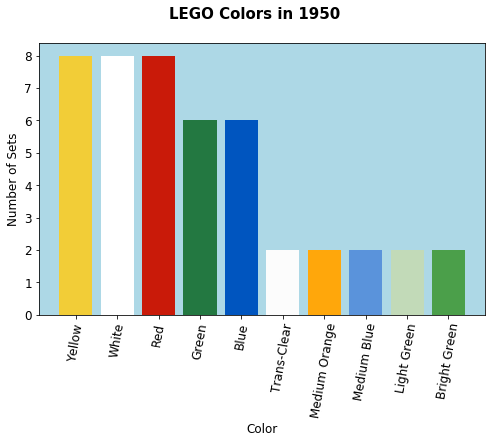

In [175]:
# Now we can plot the colors for these three years
fig, ax = plt.subplots(figsize=(8,5))
ax.set_facecolor('lightblue')
color_counts, color = color_axes(spc_beginning)
ax.bar(color_counts.index, color_counts, color=color)

# Titles & axis labels
ax.tick_params(axis='x', rotation=80)
ax.tick_params(labelsize=12)

fig.suptitle("LEGO Colors in 1950", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Color", fontsize=12)
ax.set_ylabel("Number of Sets", fontsize=12)

Text(0,0.5,'Number of Sets')

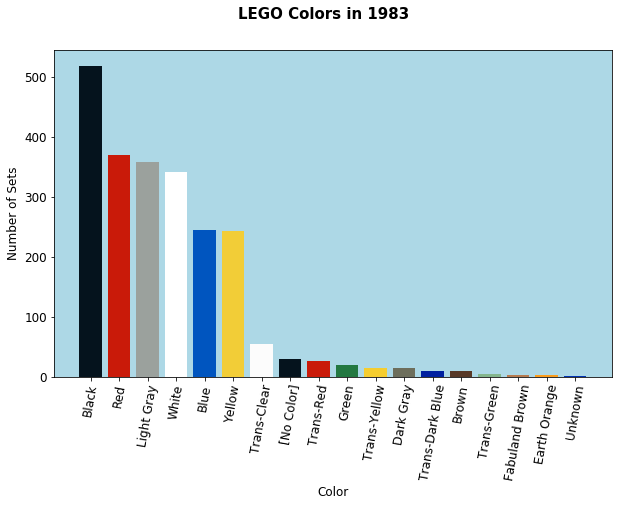

In [176]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('lightblue')
color_counts, color = color_axes(spc_middle)
ax.bar(color_counts.index, color_counts, color=color)

# Titles & axis labels
ax.tick_params(axis='x', rotation=80)
ax.tick_params(labelsize=12)

fig.suptitle("LEGO Colors in 1983", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Color", fontsize=12)
ax.set_ylabel("Number of Sets", fontsize=12)

Text(0,0.5,'Number of Sets')

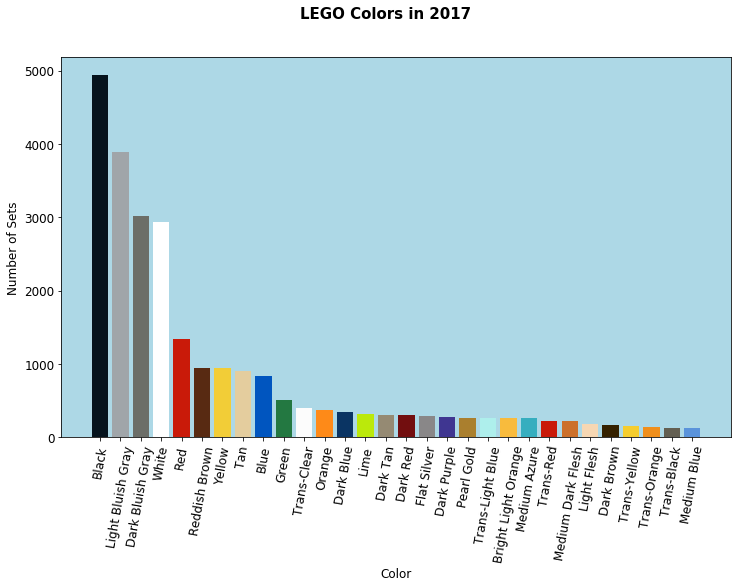

In [177]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_facecolor('lightblue')
color_counts, color = color_axes(spc_now)

# This time, we'll just to the top 30
color_counts = color_counts[:30]
color = color[:30]

ax.bar(color_counts.index, color_counts, color=color)


# Titles & axis labels
ax.tick_params(axis='x', rotation=80)
ax.tick_params(labelsize=12)

fig.suptitle("LEGO Colors in 2017", fontsize = 15, fontweight = 'bold')
ax.set_xlabel("Color", fontsize=12)
ax.set_ylabel("Number of Sets", fontsize=12)

As we can see here, black and gray colors skyrocketed somwhere in the middle of LEGO's lifetime, even though there was no black or gray in LEGO's beginnings. Many blues have been introduced as well. Some of the most popular colors, however, have also remained so since the beginning, like red, white, and yellow. Those three happen to be the colors of the LEGO logo. 

## Question 3: Have LEGO Sets been getting more complex?

We know that LEGO sets today take the form of far more than just houses and square cars. Thousands of new tiny parts with great variety of shapes have been introduced as sets become bigger, more intricate and more ambitious. Just precisely how has this evolution occured?

### How many LEGO parts have been released, debuted, and discontinued every year?

In [193]:
# Let's have one last triple line graph as we did with themes and colors, but with parts
# You get the idea, we get the three numbers for each year
parts_per_year = sets_inventory_parts.groupby("year").part_num.nunique()
new_parts_per_year = sets_inventory_parts.groupby("part_num").year.min().value_counts().sort_index()
dead_parts_per_year = sets_inventory_parts.groupby("part_num").year.max().value_counts().sort_index()

# And we construct our DataFrame
part_lifetimes = pd.DataFrame()
part_lifetimes["Parts Released"] = parts_per_year
part_lifetimes["Debuts"] = new_parts_per_year
part_lifetimes["Discontinuations"] = dead_parts_per_year
part_lifetimes.fillna(0, inplace=True)
part_lifetimes.at[2017, "Discontinuations"] = None
part_lifetimes.head()

,Parts Released,Debuts,Discontinuations
year,,,
1950,6,6,2.0
1953,6,2,5.0
1954,27,27,5.0
1955,86,68,36.0
1956,47,21,12.0


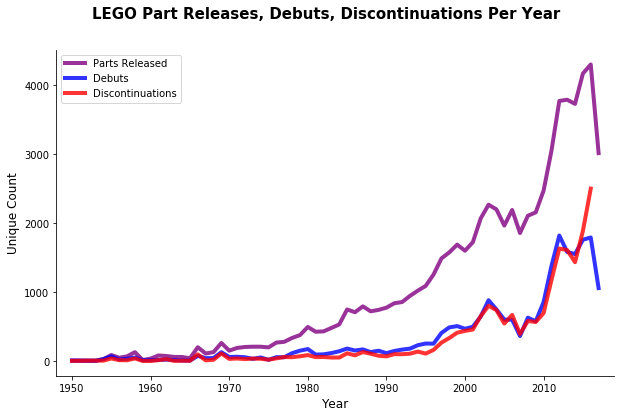

In [179]:
fig, ax = plt.subplots(figsize=(10,6))
part_lifetimes.plot(ax = ax, color = ['purple', 'blue', 'red'], linewidth = 4, alpha = 0.8)

# Adjusting the labels and axes
fig.suptitle("LEGO Part Releases, Debuts, Discontinuations Per Year", 
            fontsize = 15, fontweight = 'bold')

ax.set_xlim(1948, 2019)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Unique Count", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

Well, *this* is unepected. These three lines have extremely similar shapes. In fact, the debut and discontinuation lines are almost completely aligned. Could this be explained by many parts being replaced? The rate of emerging new and dead parts is also beginning to approach that of regular releases.

### How do we measure complexity?

In [180]:
# One way to measue the complexity of a LEGO set might be to take the unique count of it's parts
# Let's to exactly that
# First we'll match the parts with inventories once again 
inventory_part_ids = inventory_parts.set_index("inventory_id")
inventory_ids = inventories.rename(columns={"id":"inventory_id"}).set_index("inventory_id")
inventory_part_ids = inventory_part_ids.join(inventory_ids)
inventory_part_ids.head()

,part_num,color_id,quantity,is_spare,version,set_num
inventory_id,,,,,,
1,48379c01,72,1,f,1,7922-1
1,48395,7,1,f,1,7922-1
1,mcsport6,25,1,f,1,7922-1
1,paddle,0,1,f,1,7922-1
3,11816pr0005,78,1,f,1,3931-1


In [181]:
# Now we join with the sets 
sets_parts = sets.set_index("set_num").join(inventory_part_ids.set_index("set_num"))
sets_parts.head()

,name,year,theme_id,num_parts,part_num,color_id,quantity,is_spare,version
set_num,,,,,,,,,
00-1,Weetabix Castle,1970,414,471,29c01,4.0,8.0,f,1.0
00-1,Weetabix Castle,1970,414,471,29c01,15.0,6.0,f,1.0
00-1,Weetabix Castle,1970,414,471,3001a,15.0,25.0,f,1.0
00-1,Weetabix Castle,1970,414,471,3001a,4.0,9.0,f,1.0
00-1,Weetabix Castle,1970,414,471,3001a,1.0,4.0,f,1.0


In [182]:
# Verify the shape 
sets_parts.shape 

(581211, 9)

In [183]:
# Now we can get the unique part count for each set 
complexity = sets_parts.groupby("set_num").part_num.nunique()
complexity.head()

set_num
00-1    26
00-2    38
00-3    31
00-4    39
00-6     0
Name: part_num, dtype: int64

In [184]:
# Now we have a DataFrame of sets with a complexity column  
sets_complexity = sets.set_index("set_num")
sets_complexity["num_parts_unique"] = complexity
sets_complexity.head()

,name,year,theme_id,num_parts,num_parts_unique
set_num,,,,,
00-1,Weetabix Castle,1970,414,471,26
0011-2,Town Mini-Figures,1978,84,12,8
0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,0
0012-1,Space Mini-Figures,1979,143,12,6
0013-1,Space Mini-Figures,1979,143,12,6


Text(0,0.5,'Number of Parts')

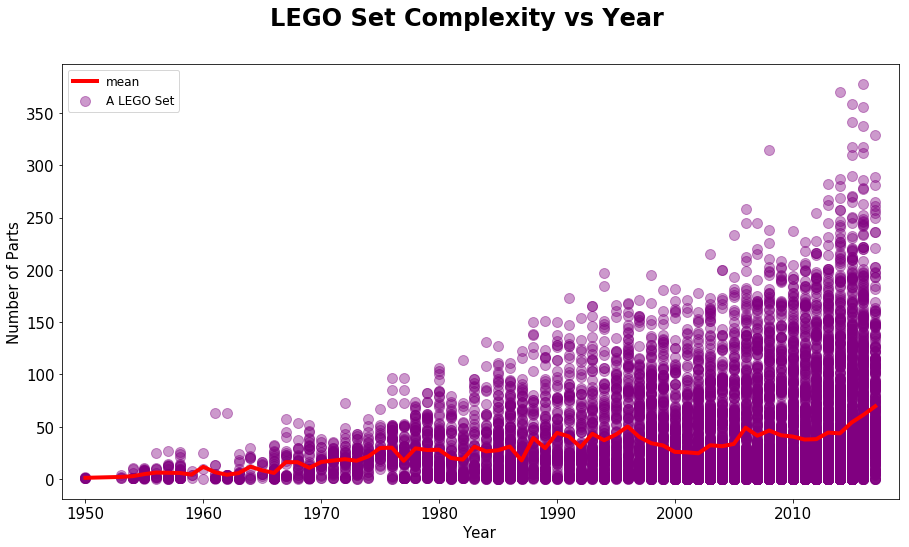

In [191]:
# Here let's plot the average complexities and scatter the individual ones
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(sets_complexity.year, sets_complexity.num_parts_unique, color = 'purple', alpha = 0.4, s = 100, linewidth=1)
ax.plot(sets_complexity.groupby('year').num_parts_unique.mean(), color = 'red', linewidth = 4)
#ax.plot(sets_complexity.groupby('year').num_parts.mean(), color = 'red', linewidth = 4)

# We'll need a legend as well as the usual 
ax.legend(["mean", "A LEGO Set"], fontsize = 12)
fig.suptitle("LEGO Set Complexity vs Year", fontsize = 24, fontweight = "bold")
ax.tick_params(labelsize = 15)
ax.set_xlim(1948,2019)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of Parts",fontsize=15)


Well, as we can see, LEGO sets have been getting slowly, slightly more complex on average every year. However, with each year, there have been more and more outliers of complexity. Some of the most complex sets have been released rather recently. 

## Conclusion

In summary, we have looked at LEGO's evolution over time in terms of themes, colors and parts and found some somewhat suprising things. It was also quite an exercise in data manipulation. With each passing year, LEGO releases and debutes more and more themes. More complex sets are released, and LEGO indeed becomes more colorful and varied in theme. Apparently, the LEGO brand is growing much faster than it's shrinking. 